In [86]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [87]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [88]:
 dataset = tf.keras.preprocessing.image_dataset_from_directory(
         "Plant_village",
         shuffle=True,
         image_size = (IMAGE_SIZE,IMAGE_SIZE),
         batch_size = BATCH_SIZE
         
   )

Found 2152 files belonging to 3 classes.


In [89]:
class_names = dataset.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [90]:
len(dataset)

68

In [91]:
 68*32

2176

In [92]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

#0: EARLY_BLIGH, 1: LATE_BLIGHT, 2: POTATO_HEALTY

(32, 256, 256, 3)
[0 2 1 1 0 0 0 0 1 0 0 2 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 2 1]


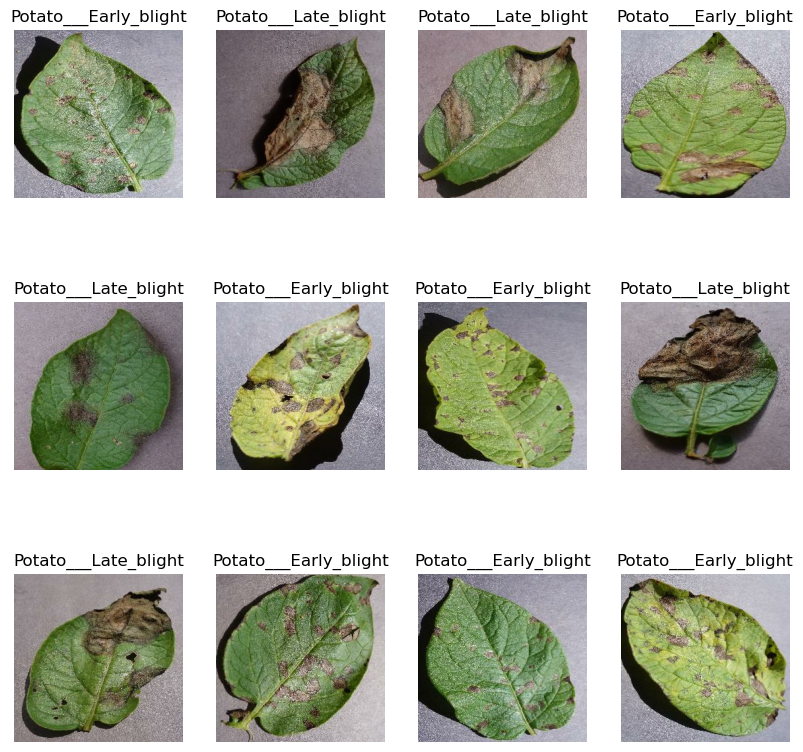

In [93]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [94]:
80% ==> Training,
20% ==> 10% validation, 10%test 

SyntaxError: invalid syntax (370300408.py, line 1)

In [ ]:
train_size = 0.8
len(dataset)*train_size

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

In [95]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [96]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [97]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [98]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [99]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
        
        ds_size = len(ds)
        
        if shuffle:
            ds = ds.shuffle(shuffle_size, seed=12
                           )
        train_size = int(train_split * ds_size)
        val_size = int(val_split * ds_size)
        
        train_ds = ds.take(train_size)
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size).skip(val_size)

        return train_ds, val_ds,test_ds

In [100]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [101]:
len(train_ds)

54

In [102]:
len(val_ds)

6

In [103]:
len(test_ds)

8

In [104]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [105]:
n_classes = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)


In [106]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

resize_and_rescale = Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, input_shape=input_shape),
    layers.Rescaling(1.0 / 255)
])

C:\Users\Shahnawaz\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [107]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [108]:
model = models.Sequential([
    resize_and_rescale,  # Resizing and Rescaling layer
    data_augmentation,   # Data augmentation layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),  # Flatten for dense layers
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(n_classes, activation='softmax')  # Output layer (for 10 classes)
])


In [109]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_13 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_14 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
from tensorflow.keras import losses

model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [123]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.6248 - loss: 0.7337 - val_accuracy: 0.7708 - val_loss: 0.4764
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.7564 - loss: 0.5311 - val_accuracy: 0.9062 - val_loss: 0.2857
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8884 - loss: 0.2916 - val_accuracy: 0.8438 - val_loss: 0.3457
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8706 - loss: 0.3514 - val_accuracy: 0.9167 - val_loss: 0.2021
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9219 - loss: 0.2105 - val_accuracy: 0.9583 - val_loss: 0.1150
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 970s 2s/step - accuracy: 0.9475 - loss: 0.1431 - val_accuracy: 0.8854 - val_loss: 0.3046
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9631 - loss: 0.1206 - val_accuracy: 0.9062 - val_loss: 0.2194
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9702 - loss: 0.0693 - val_accuracy: 0.9896 - val_lo

In [124]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 382ms/step - accuracy: 0.9731 - loss: 0.0789


In [125]:
scores

[0.07762713730335236, 0.97265625]

In [134]:
print(history.history)


NameError: name 'history' is not defined